importing the dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

data collection and processing

In [3]:
goldd=pd.read_csv('/content/gld_price_data.csv')
goldd.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
goldd.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
goldd.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
goldd.shape

(2290, 6)

In [7]:
goldd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
goldd.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

correlation 

In [10]:
correlation=goldd.corr()

<ipython-input-10-f3fd783520e2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=goldd.corr()


<Axes: >

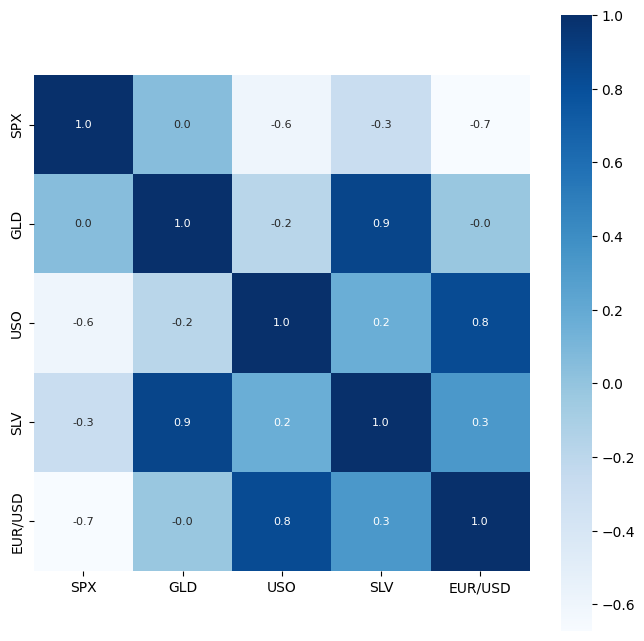

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [13]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-15-a5dabcdbc1d3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(goldd['GLD'],color='yellow')


<Axes: xlabel='GLD', ylabel='Density'>

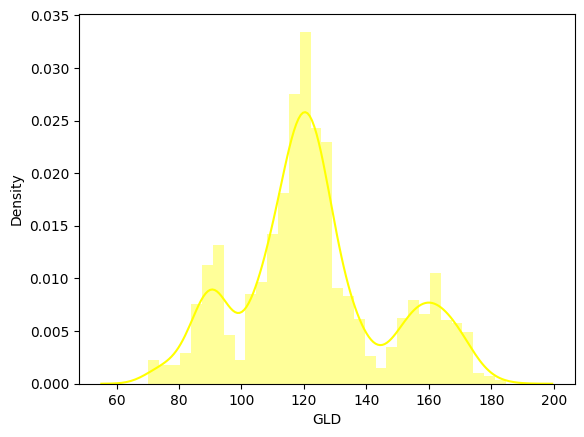

In [15]:
sns.distplot(goldd['GLD'],color='yellow')

splitting the features and target

In [16]:
x=goldd.drop(['Date','GLD'],axis=1)
y=goldd['GLD']

In [17]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [18]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting into training and test data

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

model training

In [20]:
regressor=RandomForestRegressor()

In [21]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

model evaluation

In [22]:
test_data_prediction=regressor.predict(x_test)

In [23]:
print(test_data_prediction)

[168.56999939  82.51399954 115.90219964 127.72430088 120.6970015
 154.84339734 150.25549813 125.91930069 117.55089887 125.88120079
 116.72470133 171.66060119 141.28339791 167.72809858 115.23929988
 117.59020052 140.37720307 170.24790123 159.2420034  156.74899953
 155.13259988 125.4460996  176.44649928 157.01580354 125.28590038
  93.78039973  77.66119985 120.59440016 119.05379928 167.57089917
  88.10380036 125.36870033  91.1010005  117.78250017 121.10809911
 136.56830118 115.32950103 115.30630079 145.9390996  106.99490103
 104.72580252  87.16159788 126.48760021 118.11589969 152.76529915
 119.74140033 108.7115999  108.02499845  93.1885005  127.05089762
  75.09810006 113.66729936 121.43160015 111.36509899 118.90709902
 120.5251997  159.56020043 168.33170133 146.92789655  85.77279851
  94.26500035  86.82979911  90.64680024 119.00280083 126.45220047
 127.44729967 170.06430016 122.39839919 117.24889901  98.74140029
 168.49680192 143.03709846 132.6373024  121.23370239 120.92719952
 119.720500

In [25]:
error_score=metrics.r2_score(test_data_prediction,y_test)
print(error_score)

0.9889555472554774


compare the actual and predict values with plot

In [26]:
y_test=list(y_test)

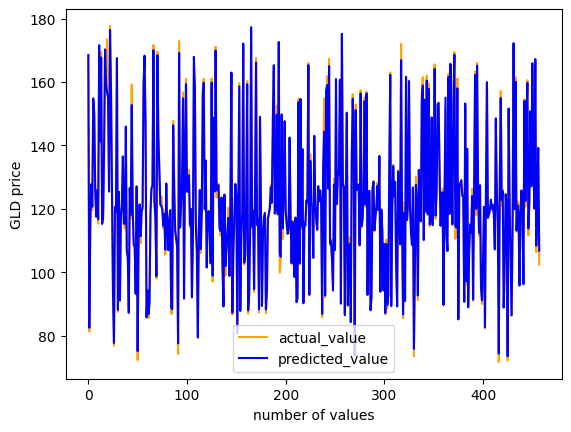

In [29]:
plt.plot(y_test,color='orange',label='actual_value')
plt.plot(test_data_prediction,color='blue',label='predicted_value')
plt.xlabel('number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()